# Pandas tutorial
### August 31, 2021
[`Pandas`](https://pandas.pydata.org) is a package for data analysis in Python.  The main data struture in `Pandas` is the Pandas DataFrame.  You can think of `Pandas` as bringing Excel or Stata into Python, where a DataFrame is like a Stata dataset or an Excel worksheet -- it contains rows of data with labeled columns.


In [1]:
# import
import pandas as pd

In [2]:
# create a dictionary with data
data = {'School': ['USC', 'USC', 'USC', 'USC', 'USC', 'USC', 'USC', 'UGA', 'UGA', 'UGA', 'UGA', 'UGA', 'UGA'] ,
        'Year': [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2015, 2016, 2017, 2018, 2019, 2020],
        'Wins': [7, 3, 6, 9, 7, 4, 2, 10, 8, 13, 11, 12, 8]}
data

{'School': ['USC',
  'USC',
  'USC',
  'USC',
  'USC',
  'USC',
  'USC',
  'UGA',
  'UGA',
  'UGA',
  'UGA',
  'UGA',
  'UGA'],
 'Year': [2014,
  2015,
  2016,
  2017,
  2018,
  2019,
  2020,
  2015,
  2016,
  2017,
  2018,
  2019,
  2020],
 'Wins': [7, 3, 6, 9, 7, 4, 2, 10, 8, 13, 11, 12, 8]}

In [3]:
# create a Pandas DataFrame from the dictionary named data
df = pd.DataFrame(data)
df

,School,Year,Wins
0,USC,2014,7
1,USC,2015,3
2,USC,2016,6
3,USC,2017,9
4,USC,2018,7
5,USC,2019,4
6,USC,2020,2
7,UGA,2015,10
8,UGA,2016,8
9,UGA,2017,13


In [4]:
# For summary stats, use the describe method
df.describe(percentiles=[0.1, 0.5, 0.9])  # summary stats

,Year,Wins
count,13.000000,13.000000
mean,2017.230769,7.692308
std,1.964427,3.376009
min,2014.000000,2.000000
10%,2015.000000,3.200000
50%,2017.000000,8.000000
90%,2019.800000,11.800000
max,2020.000000,13.000000


In [5]:
# Referencing a column
df.Wins # reference just the Wins variable

0      7
1      3
2      6
3      9
4      7
5      4
6      2
7     10
8      8
9     13
10    11
11    12
12     8
Name: Wins, dtype: int64

In [6]:
# Another way to reference a column
# you'll have to use this if your variable names has spaces or are python keywords
df['Wins']  # just reference the Wins variable

0      7
1      3
2      6
3      9
4      7
5      4
6      2
7     10
8      8
9     13
10    11
11    12
12     8
Name: Wins, dtype: int64

In [7]:
# Describe one variable
df.Wins.describe()

count    13.000000
mean      7.692308
std       3.376009
min       2.000000
25%       6.000000
50%       8.000000
75%      10.000000
max      13.000000
Name: Wins, dtype: float64

In [8]:
# Describe more than one variables -- pass a list
df[["Wins", "Year"]].describe()  # to pass multiple variable names, use a list inside []

,Wins,Year
count,13.000000,13.000000
mean,7.692308,2017.230769
std,3.376009,1.964427
min,2.000000,2014.000000
25%,6.000000,2016.000000
50%,8.000000,2017.000000
75%,10.000000,2019.000000
max,13.000000,2020.000000


In [9]:
# the loc method is helpful to reference specific cells or rows or columns
df.loc[:3, 'Wins']  #here, we are taking index 0 to 3 from the 'Wins' column

0    7
1    3
2    6
3    9
Name: Wins, dtype: int64

In [10]:
# Use the groupby method to summaries data by category
# the .mean() could be replaced by other functions (even a custom function)
df.groupby(['School']).mean()  # this will group by school and compute the mean

,Year,Wins
School,,
UGA,2017.5,10.333333
USC,2017.0,5.428571


In [11]:
# we can store the groupby result in a new dataframe
df2 = df.groupby(['School', 'Year']).mean()  # this will group by school and year and compute the mean
type(df2)

pandas.core.frame.DataFrame

## Reading  data into Pandas

Now let's read a large dataset into Pandas.  Pandas has function to read many different formats of data.  See the documentation on Pandas IO tools [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

In [12]:
# Read CSV data stored on the internet by passing a URL
kisa_2015 = pd.read_csv("https://www.kauffman.org/wp-content/uploads/2019/09/kieadata15.csv")

In [13]:
# the "head" method looks at the first observations 
# there is also a "tail" method to look at the last few
kisa_2015.head(n=3)  # to see the first 3 observations

,month,grdatn,marstat,age,class,region,state,hours,mlr,natvty,...,homeown,hoursu1b,hoursu1b_t1,se15u,se15u_t1,ent015u,ent015ua,vet,wgtat,wgtat1
0,12,42,5,57,4,1,14,40,1,57,...,NaN,40,40,0,0,0.0,0.0,0,269.172442,270.433824
1,12,39,7,26,4,1,14,40,1,57,...,NaN,40,40,0,0,0.0,0.0,0,403.023478,404.912105
2,12,41,1,43,4,2,41,46,1,110,...,NaN,46,40,0,0,0.0,0.0,0,402.790075,404.677609


In [14]:
# To get a list of column names
kisa_2015.keys()

Index(['month', 'grdatn', 'marstat', 'age', 'class', 'region', 'state',
       'hours', 'mlr', 'natvty', 'msafp', 'msastat', 'faminc', 'spneth',
       'race', 'year', 'class_t1', 'mlr_t1', 'wgta', 'ind2', 'indmaj2',
       'ind2_t1', 'indmaj2_t1', 'pid', 'yeart1', 'female', 'immigr', 'homeown',
       'hoursu1b', 'hoursu1b_t1', 'se15u', 'se15u_t1', 'ent015u', 'ent015ua',
       'vet', 'wgtat', 'wgtat1'],
      dtype='object')

In [15]:
kisa_2015.describe()

,month,grdatn,marstat,age,class,region,state,hours,mlr,natvty,...,homeown,hoursu1b,hoursu1b_t1,se15u,se15u_t1,ent015u,ent015ua,vet,wgtat,wgtat1
count,636017.000000,636017.000000,636017.000000,636017.000000,636017.000000,636017.000000,636017.000000,636017.000000,636017.000000,636017.000000,...,0.0,636017.000000,636017.000000,636017.000000,636017.000000,589842.000000,552887.000000,636017.000000,636017.000000,636017.000000
mean,6.489982,40.593822,3.342151,42.705278,2.864082,2.726215,57.003479,27.606160,2.374856,90.703682,...,NaN,28.414737,28.238516,0.066006,0.065663,0.004750,0.003306,0.055895,313.900859,313.973625
std,3.469736,2.588605,2.691200,12.894937,2.375901,1.038189,25.643191,21.379202,2.279332,84.745263,...,NaN,20.411980,20.288677,0.248293,0.247693,0.068759,0.057405,0.229719,167.540031,167.572150
min,1.000000,31.000000,1.000000,20.000000,-1.000000,1.000000,11.000000,-1.000000,1.000000,57.000000,...,NaN,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.788151,10.786317
25%,3.000000,39.000000,1.000000,32.000000,1.000000,2.000000,34.000000,-1.000000,1.000000,57.000000,...,NaN,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,160.208050,160.262067
50%,6.000000,40.000000,1.000000,43.000000,4.000000,3.000000,58.000000,39.000000,1.000000,57.000000,...,NaN,40.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,355.775367,355.877853
75%,10.000000,43.000000,7.000000,54.000000,4.000000,4.000000,82.000000,40.000000,4.000000,57.000000,...,NaN,40.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,435.670221,435.781077
max,12.000000,46.000000,7.000000,64.000000,8.000000,4.000000,95.000000,198.000000,7.000000,555.000000,...,NaN,99.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2723.815519,2723.352458


In [16]:
# Create a lifecycle profile of income using groupby
kisa_2015[['faminc', 'age']].groupby('age').mean()

,faminc
age,
20,10.549287
21,10.192841
22,10.252649
23,10.270324
24,10.427564
25,10.490172
26,10.597834
27,10.775631
28,10.989080


In [17]:
import matplotlib.pyplot as plt
# magic command to display plots in notebook
%matplotlib inline

<AxesSubplot:xlabel='age'>

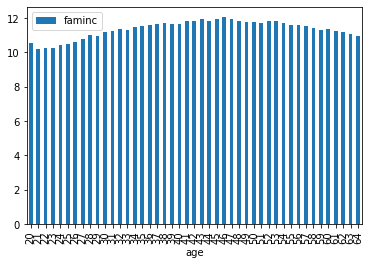

In [18]:
# Pandas also has built in plotting functions
# Below, we use four functions together in one line (groupby, mean, plot, bar)
kisa_2015[['faminc', 'age']].groupby('age').mean().plot.bar(y='faminc')

In [19]:
# and we can have many dataframes in memory at once
kisa_2013 = pd.read_csv('https://s3.amazonaws.com/kauffman-index/kieadata13.csv')

<AxesSubplot:xlabel='age'>

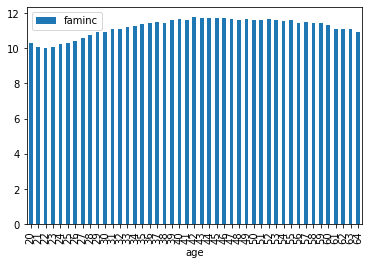

In [20]:
kisa_2013[['faminc', 'age']].groupby('age').mean().plot.bar(y='faminc')